# dataset link: https://www.kaggle.com/roshansharma/online-shoppers-intention

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing dataset
df = pd.read_csv("online_shoppers_intention.csv")

In [3]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
df.shape

(12330, 18)

In [5]:
na = df.isnull().sum()
na

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [6]:
df.fillna(0, inplace = True)
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [8]:
Month = {'Feb': 1,'Mar': 2,'May':3,'Oct':4,'June':5,'Jul':6,'Aug':7,'Nov':8,'Sep':9,'Dec':10}
df.Month = [Month[item] for item in df.Month]

In [9]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [10]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [11]:
VisitorType = {'Returning_Visitor': 1,'New_Visitor': 2,'Other':3}
df.VisitorType = [VisitorType[item] for item in df.VisitorType]

kmeans clustering

In [12]:
x = df.iloc[:, [1,2,3,4,5, 6,7,8,9,10,11,12,13,14,15,16]].values
x.shape

(12330, 16)

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,max_iter=100,random_state = 0)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

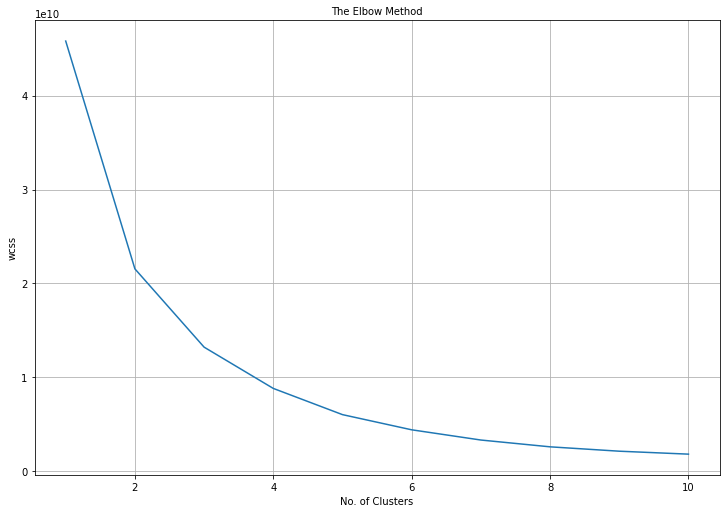

In [14]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 10)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
km = KMeans(n_clusters = 2, max_iter = 100, random_state = 0)
y_means = km.fit_predict(x)
y_means
from sklearn.metrics import silhouette_samples,silhouette_score
silscore=silhouette_score(df,km.labels_,metric='euclidean')
silscore

0.7814404022174368

In [16]:
km = KMeans(n_clusters = 3, max_iter = 100, random_state = 0)
y_means = km.fit_predict(x)
y_means
from sklearn.metrics import silhouette_samples,silhouette_score
silscore=silhouette_score(df,km.labels_,metric='euclidean')
silscore

0.6949563563502706

In [17]:
km = KMeans(n_clusters = 4,max_iter = 100, random_state = 0)
y_means = km.fit_predict(x)
y_means
from sklearn.metrics import silhouette_samples,silhouette_score
silscore=silhouette_score(df,km.labels_,metric='euclidean')
silscore

0.6754030287342987

knn classification

In [18]:
##Splitting to training and testing
X=df.drop('Region', axis=1)
y=df['Region']

In [19]:
##Splitting to training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)
print(X_train.shape)
print(y_test.shape)

(7398, 17)
(4932,)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

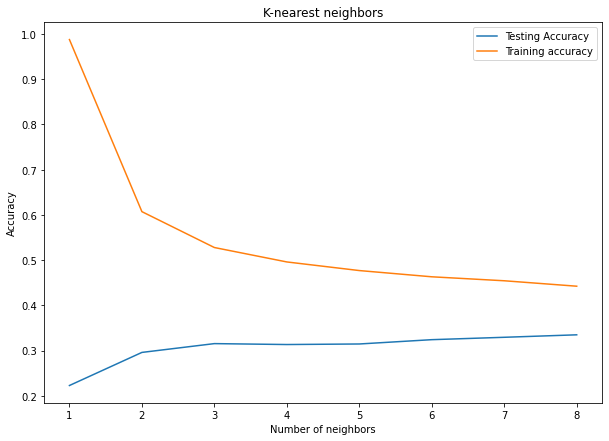

In [21]:
plt.title('K-nearest neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.29582319545823194

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.31528791565287917

In [24]:
from sklearn.metrics import confusion_matrix
y_predict = knn.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[1348,  156,  274,   77,   10,   18,   17,    7,    5],
       [ 327,   29,   60,   20,    3,    6,    8,    0,    1],
       [ 677,   70,  141,   29,    5,   19,   13,    2,    5],
       [ 345,   41,   57,   19,    0,    6,    1,    3,    1],
       [  90,   14,   19,    1,    1,    2,    0,    0,    0],
       [ 226,   39,   37,   11,    2,    4,    2,    0,    1],
       [ 197,   33,   51,   11,    1,    2,    7,    0,    2],
       [ 120,   18,   22,    9,    0,    3,    0,    2,    0],
       [ 134,   14,   42,    6,    0,    2,    2,    1,    4]])

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.39      0.71      0.50      1912
           2       0.07      0.06      0.07       454
           3       0.20      0.15      0.17       961
           4       0.10      0.04      0.06       473
           5       0.05      0.01      0.01       127
           6       0.06      0.01      0.02       322
           7       0.14      0.02      0.04       304
           8       0.13      0.01      0.02       174
           9       0.21      0.02      0.04       205

    accuracy                           0.32      4932
   macro avg       0.15      0.11      0.10      4932
weighted avg       0.23      0.32      0.25      4932



Kmedoid Clustering

In [26]:
!pip install scikit-learn-extra

In [27]:
from sklearn_extra.cluster import KMedoids
kmediod=KMedoids(n_clusters=2,random_state=0)
kmediod.fit(df)
ykmedoid= kmediod.fit_predict(df)

In [28]:
silhoscore=silhouette_score(df,ykmedoid)
print('Silhouette Score: %.3f' % silhoscore)

Silhouette Score: 0.630


In [29]:
kmediod=KMedoids(n_clusters=3,random_state=0)
kmediod.fit(df)
ykmedoid= kmediod.fit_predict(df)
silhoscore=silhouette_score(df,ykmedoid)
print('Silhouette Score: %.3f' % silhoscore)

Silhouette Score: 0.545


In [30]:
kmediod=KMedoids(n_clusters=4,random_state=0)
kmediod.fit(df)
ykmedoid= kmediod.fit_predict(df)
silhoscore=silhouette_score(df,ykmedoid)
print('Silhouette Score: %.3f' % silhoscore)

Silhouette Score: 0.515


KMode Clustering

In [31]:
!pip install kmodes
from scipy import stats
from kmodes.kmodes import KModes

In [32]:
kmode=KModes(n_clusters=2,verbose=1,n_init=2)
ykmode=kmode.fit_predict(df)
print(kmode)
print(ykmode)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1166, cost: 100971.0
Run 1, iteration: 2/100, moves: 185, cost: 100971.0
KModes(n_clusters=2, verbose=1)
[1 0 0 ... 0 0 0]


In [33]:
score=[]
for num_clusters in list(range(1,11)):
    kmode=KModes(n_clusters=num_clusters,verbose=1)
    kmode.fit_predict(df)
    score.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 105387.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1166, cost: 100971.0
Run 1, iteration: 2/100, moves: 185, cost: 100971.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1547, cost: 99443.0
Run 1, iteration: 2/100, moves: 171, cost: 99443.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2296, cost: 97009.0
Run 1, iteration: 2/100, moves: 678, cost: 96551.0
Run 1, iteration: 3/100, moves: 463, cost: 96551.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2383, cost: 96561.0
Run 1, iteration: 2/100, moves: 659, cost: 96112.0
Run 1, iteration: 3/100, moves: 395, cost: 96112.0
Init: initializing centroids
Init:

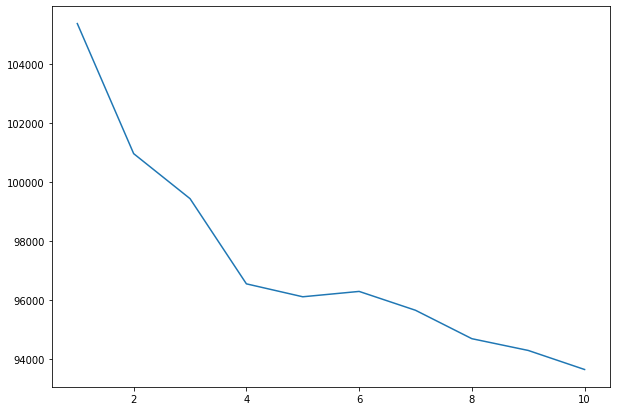

In [34]:
y=np.array([i for i in range(1,11,1)])
plt.plot(y,score)

In [35]:
kmode=KModes(n_clusters=3,verbose=1,n_init=2)
ykmode=kmode.fit_predict(df)
print(kmode)
print(ykmode)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1547, cost: 99443.0
Run 1, iteration: 2/100, moves: 171, cost: 99443.0
KModes(n_clusters=3, verbose=1)
[1 0 1 ... 0 0 0]


In [36]:
kmode=KModes(n_clusters=4,verbose=1,n_init=2)
ykmode=kmode.fit_predict(df)
print(kmode)
print(ykmode)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2296, cost: 97009.0
Run 1, iteration: 2/100, moves: 678, cost: 96551.0
Run 1, iteration: 3/100, moves: 463, cost: 96551.0
KModes(n_clusters=4, verbose=1)
[3 0 3 ... 3 0 0]


from the 4 algorithms kmeans has the highest silhouette score of 78% with number of clusters=2 